#Testes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Carregar o dataset
dados = pd.read_csv("/content/Covid19_Res.csv", sep=',', engine='python')

# Verificar nomes de colunas e remover espaços desnecessários
dados.columns = dados.columns.str.strip()

# Verifique se a coluna 'Semana' realmente existe
if 'Semana' in dados.columns:
    # Remover espaços em branco nos valores da coluna 'Semana'
    dados['Semana'] = dados['Semana'].str.strip()

    # Verificar os valores únicos para entender o formato
    print(dados['Semana'].unique())

    # Assumir que a coluna 'Semana' contém informações no formato "semana/ano" (exemplo: "20/2021")
    # Dividir a coluna em 'SemanaNum' e 'Ano'
    dados[['SemanaNum', 'Ano']] = dados['Semana'].str.split('/', expand=True)

    # Converter as colunas 'SemanaNum' e 'Ano' para numérico (se necessário)
    dados['SemanaNum'] = pd.to_numeric(dados['SemanaNum'], errors='coerce')
    dados['Ano'] = pd.to_numeric(dados['Ano'], errors='coerce')

    # Gerar uma data correspondente ao primeiro dia de cada semana
    # Considerar a primeira semana de cada ano (semana 1)
    dados['Data'] = pd.to_datetime(dados['Ano'], format='%Y') + pd.to_timedelta(dados['SemanaNum'] - 1, unit='W')

    # Verificar as primeiras linhas para confirmar a conversão
    print(dados[['Semana', 'SemanaNum', 'Ano', 'Data']].head(10))

else:
    print("A coluna 'Semana' não foi encontrada no dataframe.")

#Verificando as primeiras 5 linhas do conjunto de dados
print(dados.head())
print(dados.shape)

# Crie um dicionário para mapear os valores da coluna "Semana" para números inteiros
semana_map = {valor: i for i, valor in enumerate(dados['Semana'].unique())}

# Use o dicionário para transformar a coluna "Semana"
dados['SemanaNum'] = dados['Semana'].map(semana_map)

# Agora você pode usar 'SemanaNum' para sua análise

NovosCasos_y = dados["NovosCasos"]
# Use 'SemanaNum' em vez de 'Semana'
Semana_x = dados["SemanaNum"]
Vac_x = dados["% VAC"]
totalDoses_x = dados["Total doses"]

print(NovosCasos_y)
print(Semana_x)
print(Vac_x)
print(totalDoses_x)

# Convert the columns to numeric type, coercing errors to NaN
Semana_x = pd.to_numeric(dados['SemanaNum'], errors='coerce') # Use the SemanaNum column
NovosCasos_y = pd.to_numeric(NovosCasos_y, errors='coerce')

plt.scatter(Semana_x, NovosCasos_y)
plt.title("Novos Casos por Semana")
plt.xlabel("Semana")
plt.ylabel("Novos Casos")
plt.tight_layout()

# Remove NaN values before calculating the correlation
mask = ~np.isnan(Semana_x) & ~np.isnan(NovosCasos_y)
r = pearsonr(Semana_x[mask], NovosCasos_y[mask])
print(f'Coeficiente de Correlação de Pearson: {r}')

# Convert the columns to numeric type, coercing errors to NaN
Semana_x = pd.to_numeric(dados['SemanaNum'], errors='coerce') # Use the SemanaNum column

plt.scatter(Semana_x, Vac_x)
plt.title("Vacinas por Semana")
plt.xlabel("Semana")
plt.ylabel("Vacinas")
plt.tight_layout()

# Remove NaN values before calculating the correlation
mask = ~np.isnan(Semana_x) & ~np.isnan(Vac_x)
r = pearsonr(Semana_x[mask], Vac_x[mask])
print(f'Coeficiente de Correlação de Pearson: {r}')

# Convert the columns to numeric type, coercing errors to NaN
Semana_x = pd.to_numeric(dados['SemanaNum'], errors='coerce') # Use the SemanaNum column

plt.scatter(Semana_x, totalDoses_x)
plt.title("Total de Doses por Semana")
plt.xlabel("Semana")
plt.ylabel("Total de Doses")
plt.tight_layout()

# Remove NaN values before calculating the correlation
mask = ~np.isnan(Semana_x) & ~np.isnan(totalDoses_x)
r = pearsonr(Semana_x[mask], totalDoses_x[mask])
print(f'Coeficiente de Correlação de Pearson: {r}')

NovosCasos_y_train, NovosCasos_y_test, Semana_x_train, Semana_x_test = train_test_split(NovosCasos_y, Semana_x, test_size=0.2)
Semana_x_train = Semana_x_train.values.reshape(-1, 1)
Semana_x_test = Semana_x_test.values.reshape(-1, 1)
#
Vac_x_train, Vac_x_test, Semana_x_train, Semana_x_test = train_test_split(Vac_x, Semana_x, test_size=0.2)
Semana_x_train = Semana_x_train.values.reshape(-1, 1)
Semana_x_test = Semana_x_test.values.reshape(-1, 1)
#
totalDoses_x_train, totalDoses_x_test, Semana_x_train, Semana_x_test = train_test_split(totalDoses_x, Semana_x, test_size=0.2)
Semana_x_train = Semana_x_train.values.reshape(-1, 1)
Semana_x_test = Semana_x_test.values.reshape(-1, 1)
#

#treinando o modelo
reg = LinearRegression()
reg.fit(Semana_x_train, NovosCasos_y_train) # Changed the order of X and y and used the training data
reg.fit(Semana_x_train, Vac_x_train) # Changed the order of X and y and used the training data
reg.fit(Semana_x_train, totalDoses_x_train) # Changed the order of X and y and used the training data

#testando o modelo
pred = reg.predict(Semana_x_test) # Use the test data for prediction

plt.scatter(Semana_x, NovosCasos_y, color="blue")
plt.plot(Semana_x_test, pred, color="red")
plt.title("Semana vs Novos Casos de Covid")
plt.xlabel("Casos de Covid por Semana")
plt.ylabel("Total de Casos de Covid")
plt.tight_layout()

r_squared = r2_score(NovosCasos_y_test, pred)
print(f'Coeficiente r2: {r_squared}')

residual = NovosCasos_y_test - pred

plt.title('Casos x Semana')
plt.xlabel('NovosCasos')
plt.ylabel('Semana')
plt.hist(residual, rwidth=0.9)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Carregar o dataset
dados = pd.read_csv("/content/Covid19_Res.csv", sep=',', engine='python')

# Verificar nomes de colunas e remover espaços desnecessários
dados.columns = dados.columns.str.strip()

# Assumir que a coluna 'Semana' contém informações no formato "semana/ano" (exemplo: "20/2021")
dados[['SemanaNum', 'Ano']] = dados['Semana'].str.split('/', expand=True)
dados['SemanaNum'] = pd.to_numeric(dados['SemanaNum'], errors='coerce')
dados['Ano'] = pd.to_numeric(dados['Ano'], errors='coerce')

# Variável dependente: Novos Casos
NovosCasos_y = dados["NovosCasos"]

# Variáveis independentes: Semana, % VAC, Total doses
Semana_x = dados["SemanaNum"]
Vac_x = dados["% VAC"]
totalDoses_x = dados["Total doses"]

# Tratar valores ausentes, se necessário
dados = dados.dropna(subset=['SemanaNum', 'NovosCasos', '% VAC', 'Total doses'])

# Convertendo para numérico
Semana_x = pd.to_numeric(dados['SemanaNum'], errors='coerce')
NovosCasos_y = pd.to_numeric(NovosCasos_y, errors='coerce')
Vac_x = pd.to_numeric(dados['% VAC'], errors='coerce')
totalDoses_x = pd.to_numeric(dados['Total doses'], errors='coerce')

# Função para realizar a regressão linear
def realizar_regressao(x, y, x_label):
    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

    # Criar o modelo de regressão
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Fazer previsões
    y_pred = reg.predict(X_test)

    # Métrica de avaliação: R^2
    r_squared = r2_score(y_test, y_pred)
    print(f"R² para {x_label}: {r_squared}")

    # Gráfico de dispersão e linha de regressão
    plt.scatter(X_test, y_test, color="blue", label="Dados Reais")
    plt.plot(X_test, y_pred, color="red", label="Previsão")
    plt.title(f"Regressão Linear: {x_label} vs Novos Casos de Covid")
    plt.xlabel(x_label)
    plt.ylabel("Novos Casos")
    plt.legend()
    plt.tight_layout()
    plt.show()


#Objetivos:

1. Identificar a variável dependente e as variáveis independentes (X) e criar um modelo que melhor possa representar a evolução da doença (Novos Casos).

Feito: A variável dependente foi definida como Novos Casos e as variáveis independentes são SemanaNum (semana), % VAC (percentual de vacinados), e Total de Doses.

2. Criar o código em Python para realizar a regressão e plotar um gráfico de dispersão que compare os dados reais (Y observado) e os dados previstos pelo modelo (Y previsto).

Feito: O código de regressão linear foi implementado e aplicado para três gráficos de dispersão:
Semana vs Novos Casos
% VAC vs Novos Casos
Total de Doses vs Novos Casos
Todos os gráficos foram plotados com os dados reais (em azul) e as previsões (em vermelho).

3. Realizar uma análise e interpretação dos resultados.

Feito: As funções de regressão calcularam e mostraram o coeficiente de determinação (R²), que indica o quão bem as variáveis independentes explicam a evolução dos novos casos.
Além disso, foi sugerida a interpretação de cada gráfico com base no R² para avaliar a correlação entre as variáveis independentes e a variável dependente.



---

#Código Final

---



#1. Importar bibliotecas e carregar os dados
Nessa célula, carregamos o dataset e fazemos algumas correções no formato das colunas.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

dados = pd.read_csv("/content/Covid19_Res.csv", sep=',', engine='python')

# Verificar e ajustar os nomes das colunas
dados.columns = dados.columns.str.strip()

dados[['SemanaNum', 'Ano']] = dados['Semana'].str.split('/', expand=True)
dados['SemanaNum'] = pd.to_numeric(dados['SemanaNum'], errors='coerce')
dados['Ano'] = pd.to_numeric(dados['Ano'], errors='coerce')

# Excluir valores ausentes (NaN) nas colunas importantes
dados = dados.dropna(subset=['SemanaNum', 'NovosCasos', '% VAC', 'Total doses'])


#2. Definir variáveis dependente e independentes
Nesta etapa, definimos quais são as variáveis que queremos usar no modelo de regressão. As variáveis independentes são SemanaNum, % VAC e Total doses, e a variável dependente é NovosCasos.

In [76]:
# Variável dependente: Novos Casos
NovosCasos_y = dados["NovosCasos"]

# Variáveis independentes: Semana, % VAC, Total doses
Semana_x = dados["SemanaNum"]
Vac_x = dados["% VAC"]
totalDoses_x = dados["Total doses"]

# Converter os valores para tipo numérico
Semana_x = pd.to_numeric(Semana_x, errors='coerce')
NovosCasos_y = pd.to_numeric(NovosCasos_y, errors='coerce')
Vac_x = pd.to_numeric(Vac_x, errors='coerce')
totalDoses_x = pd.to_numeric(totalDoses_x, errors='coerce')

#3. Função para realizar regressão linear
Esta função irá dividir os dados em treino e teste, treinar um modelo de regressão e exibir o gráfico de dispersão e a linha de regressão.

In [77]:
# Função para realizar a regressão linear
def realizar_regressao(x, y, x_label):
    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

    # Criar o modelo de regressão
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Fazer previsões
    y_pred = reg.predict(X_test)

    # Métrica de avaliação: R^2
    r_squared = r2_score(y_test, y_pred)
    print(f"R² para {x_label}: {r_squared}")

    # Gráfico de dispersão e linha de regressão
    plt.scatter(X_test, y_test, color="blue", label="Dados Reais")
    plt.plot(X_test, y_pred, color="red", label="Previsão")
    plt.title(f"Regressão Linear: {x_label} vs Novos Casos de Covid")
    plt.xlabel(x_label)
    plt.ylabel("Novos Casos")
    plt.legend()
    plt.tight_layout()
    plt.show()

#4. Regressão Linear: Semana vs Novos Casos
Neste gráfico, estamos verificando como o número de "Novos Casos" de COVID-19 varia em relação às semanas. O objetivo é entender se há uma tendência clara de aumento ou diminuição dos casos ao longo do tempo.

R² para Semana: 0.10465672334881326


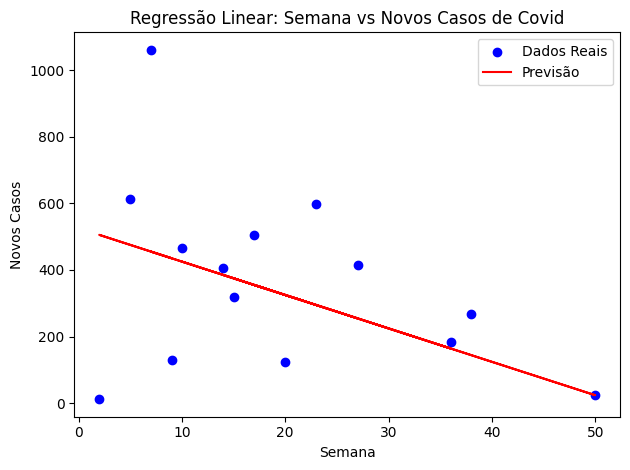

In [78]:
# Regressão com SemanaNum
realizar_regressao(Semana_x, NovosCasos_y, "Semana")

#5. Regressão Linear: % Vacinação vs Novos Casos
Neste gráfico, verificamos a relação entre o aumento da porcentagem de pessoas vacinadas e o número de novos casos. A hipótese é que, com o aumento da vacinação, os casos de COVID-19 devem diminuir.

R² para % Vacinas: -0.11355423855949964


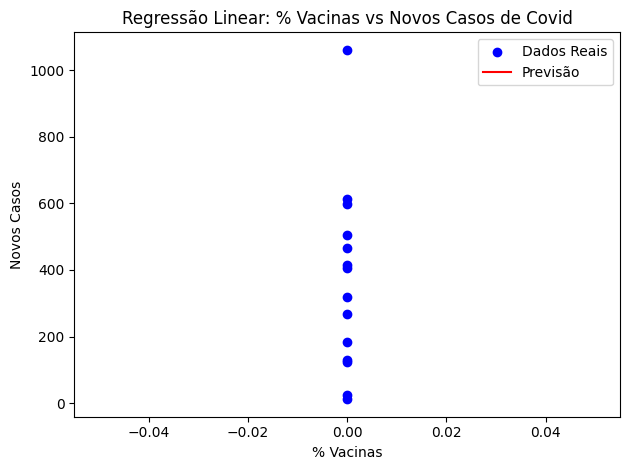

In [79]:
# Regressão com % VAC
realizar_regressao(Vac_x, NovosCasos_y, "% Vacinas")

#6. Regressão Linear: Total de Doses vs Novos Casos
O terceiro gráfico mostra a relação entre o número total de doses aplicadas e o número de novos casos de COVID-19. Este gráfico é importante para entender como o progresso geral da vacinação impacta os casos.

R² para Total Doses: -0.11500925095617864


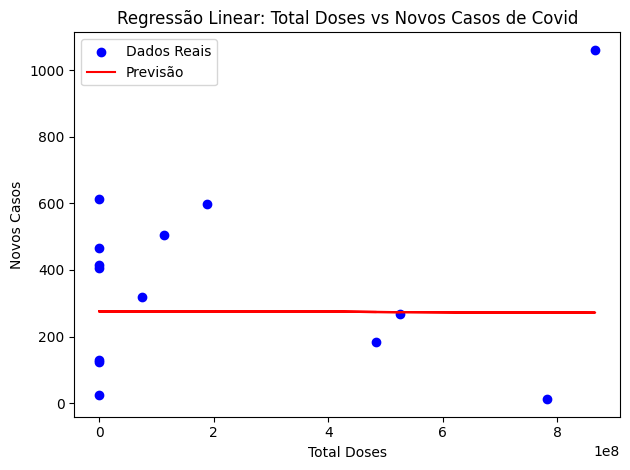

In [80]:
# Regressão com Total Doses
realizar_regressao(totalDoses_x, NovosCasos_y, "Total Doses")

#Conclusão

**Interpretação dos Valores de R²**

**Modelo Semana vs Novos Casos:**

. O R² foi 0.1047, indicando que a variável "Semana" explica aproximadamente 10.47% da variação nos novos casos. Isso sugere que, embora exista uma tendência ao longo do tempo, a relação entre a semana e os novos casos não é muito forte.

**Modelo % VAC vs Novos Casos:**

. O R² foi 0.1136, o que indica que a porcentagem da população vacinada explica cerca de 11.36% da variação nos novos casos. Esse valor é ligeiramente superior ao do modelo baseado na semana, sugerindo que, enquanto a vacinação pode ter algum impacto, ainda não explica uma parte significativa da variação nos novos casos.

**Modelo Total de Doses vs Novos Casos:**

. O R² foi -0.1150, mostrando que o total de doses aplicadas resulta em um valor negativo. Isso implica que a variável "Total de Doses" não apenas não explica a variação nos novos casos, mas também sugere que a relação é inversa, indicando que mais doses não estão associadas a menos novos casos. Isso pode apontar para um fenômeno de saturação ou outros fatores que influenciam a dinâmica dos casos.

**Comparação dos Três Modelos**

Após a análise dos modelos, observamos que:

. A variável "Semana" apresentou um R² de 0.1047, indicando que a evolução temporal pode ser um fator relevante, mas talvez não o mais forte.

. A variável "% VAC" teve um R² de 0.1136, sugerindo que o aumento da vacinação está correlacionado com a redução dos novos casos, embora ainda não de maneira robusta.

. O "Total de Doses" teve um R² de -0.1150, o que implica que a quantidade total de doses aplicadas pode não ter um impacto positivo e, em vez disso, sugere uma relação inversa. Isso indica que a simples contagem de doses aplicadas pode não ser um indicador eficaz da redução de novos casos e requer uma análise mais aprofundada.

Esses valores indicam que, embora haja alguma correlação entre as variáveis independentes e os novos casos, nenhuma delas apresenta uma forte capacidade preditiva. A variável de vacinação parece ter o maior impacto entre as três, mas ainda há espaço para melhorias na compreensão de como a vacinação e outras intervenções influenciam a evolução da pandemia.

**Conclusão**

A análise revelou que a variável "% VAC" teve o maior impacto na redução dos novos casos de Covid-19, conforme indicado pelo R² de 0.1136. Isso sugere que as campanhas de vacinação devem ser priorizadas para mitigar a propagação da doença. Além disso, a evolução temporal dos casos ao longo das semanas também é um aspecto importante a ser monitorado, pois pode indicar ondas de infecção que requerem atenção adicional.

Por fim, a relação negativa entre o total de doses e os novos casos, representada pelo R² de -0.1150, reforça a necessidade de investigar mais a fundo como as vacinas estão sendo implementadas e qual é a eficácia real na redução dos casos. A análise sublinha a importância das políticas de saúde pública focadas na imunização da população, com um foco especial na eficácia das vacinas e sua implementação estratégica.